### HELP- NGO Countries segmentation for financial help ###

In [1]:
# Analysis
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# K-means Clustering
import sklearn
from sklearn.cluster import KMeans

# Hierarchical Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# For scaling data
from sklearn.preprocessing import scale

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# set the max rows,column width
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width', 1000)

In [3]:
# Import data-set to dataframe
df_country = pd.read_csv('C:/Users/hp/Pictures/Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###### Perfrom sanity testing of dataframe ######

In [4]:
# Check the shape of dataframe
rows,columns = df_country.shape
print("Original Dataset")
print("Number of rows : ",rows)
print("Number of columns : ",columns)


Original Dataset
Number of rows :  167
Number of columns :  10


In [5]:
# describe the dataframe  for numerical columns to check the mean, standard deviation etc.
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
# Check the column names
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], dtype='object')

In [7]:
# Check the info of the object to check the type of data and null objects
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


###### All the varibales are present in the required data types and do not required to change the data type ######

In [8]:
round(100*(df_country.isnull().sum(axis = 0)/len(df_country)),2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [9]:
# There are zero null values present in the dataframe

### Data prepration and Analysis ###

In [10]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


###### From the data given, we observed that there are three columns ["health","exports","imports"] are given as %age of gdpp. It is required to convert them to actual values to get the correct scaler data.######

In [11]:
df_country['imports'] = df_country['imports']*(df_country['gdpp']/100)
df_country['exports'] = df_country['exports']*(df_country['gdpp']/100)
df_country['health']  = df_country['health']*(df_country['gdpp']/100)

In [12]:
# now check the data again

In [13]:
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


<Figure size 1440x1440 with 0 Axes>

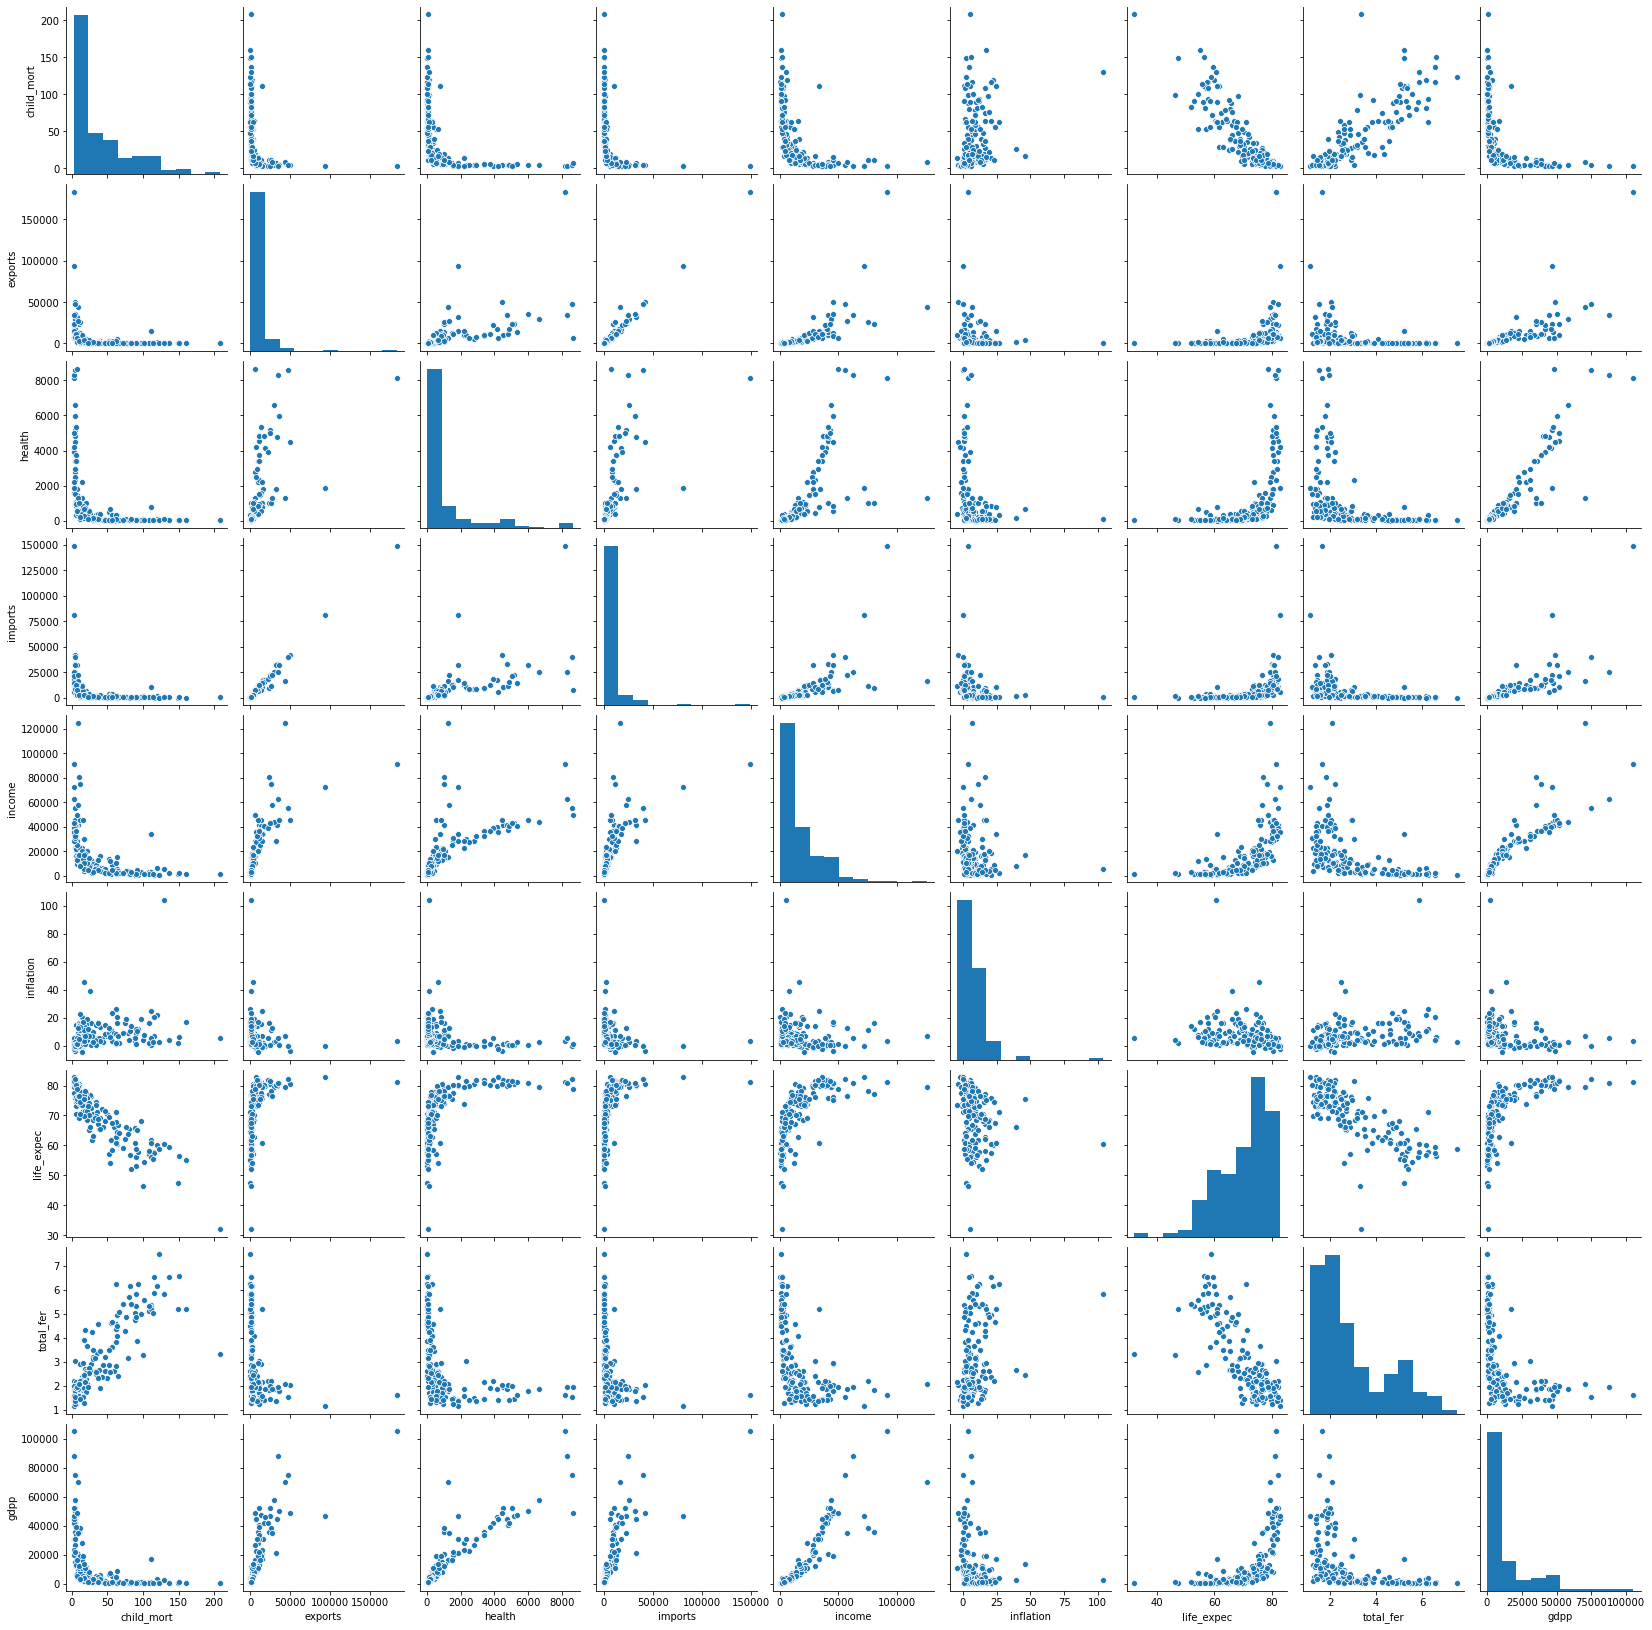

In [14]:
# Visualizing the numerical variables
plt.figure(figsize = (20,20))
sns.pairplot(df_country)
plt.show()

In [15]:
# To check the co-relation between the variables, plot the heat map
country_corr = df_country.corr()
country_corr

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


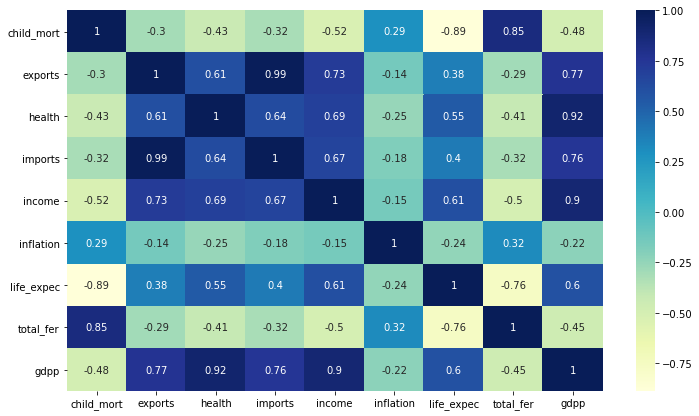

In [16]:
plt.figure(figsize = (12,7))
sns.heatmap(country_corr,annot = True,cmap="YlGnBu")
plt.show()

##### from above figure, we can observe the following:
###### >> There is very high co-relation between health and gdpp, income and gdp (around 90 %)
###### >> There are variables which are negatively co-related like health and inflation, inflation and income.

In [17]:
# for analysis,it is required to drop the country column.
df = df_country.drop(['country'],axis= 1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


##### Now, we have analyzed the data nd prepared the data for PCA and modeling #####

## Principal Component Analysis ##

In [18]:
# Scaling the data to avoid any clustering issues
# When all the variables are numeric (float or int values), we use standard scaler
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaler_data = standard_scaler.fit_transform(df)

In [19]:
scaler_data

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [20]:
# import PCA from sklearn library
from sklearn.decomposition import PCA
pca = PCA(svd_solver = 'randomized',random_state = 42)

In [21]:
pca.fit(scaler_data)

PCA(random_state=42, svd_solver='randomized')

In [22]:
# check the component list of PCA
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [23]:
# Now, check the variance ratios of variables
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

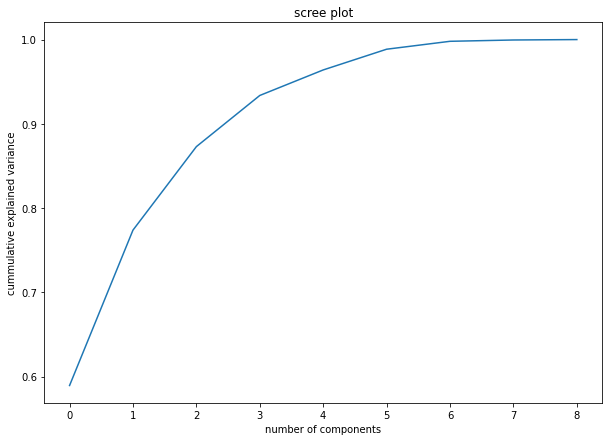

In [24]:
# Plot the scree plot to check the cummulative co-variance of the components
%matplotlib inline
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
ax.set(title = 'scree plot',xlabel = 'number of components',ylabel = 'cummulative explained variance')
ax.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [25]:
# adding column names to the first column in the PCA compnets dataframe
#df.columns
column_names = list(df.columns)
df_pca = pd.DataFrame({'Feature':column_names,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2]})
df_pca

,Feature,PC1,PC2,PC3
0,child_mort,-0.316392,0.476267,-0.150012
1,exports,0.342887,0.397311,-0.030574
2,health,0.358535,0.155053,-0.075703
3,imports,0.344865,0.370781,-0.072174
4,income,0.380041,0.128384,0.145764
5,inflation,-0.143085,0.221261,0.948419
6,life_expec,0.343857,-0.369820,0.196752
7,total_fer,-0.302842,0.459715,-0.077834
8,gdpp,0.399988,0.200624,0.010339


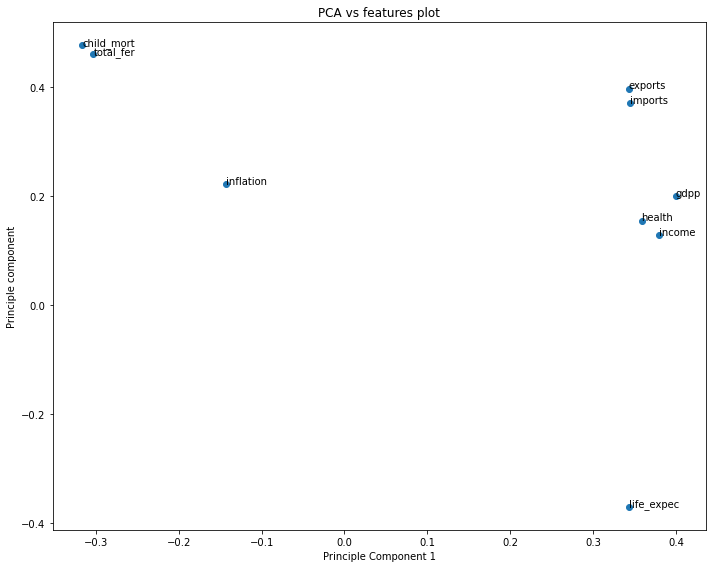

In [26]:
# Visualize the features created in PCA dataframe
%matplotlib inline
fig = plt.figure(figsize = (10,8))
ax1 = fig.add_subplot(111)
ax1.set(title = "PCA vs features plot", xlabel = "Principle Component 1",ylabel = "Principle component")
plt.scatter(df_pca.PC1,df_pca.PC2)
for i,txt in enumerate(df_pca.Feature):
    plt.annotate(txt,(df_pca.PC1[i],df_pca.PC2[i]))
plt.tight_layout()
plt.show()

In [27]:
# dimensionality reduction of dataframe
from sklearn.decomposition import IncrementalPCA
pca_result = IncrementalPCA(n_components = 3)

In [28]:
df_pca_inc = pca_result.fit_transform(scaler_data)

In [29]:
df_pca_inc

array([[-2.63744157e+00,  1.46903797e+00, -5.41359106e-01],
       [-2.22769569e-02, -1.43189586e+00, -2.07009539e-02],
       [-4.57626261e-01, -6.73300938e-01,  9.61867281e-01],
       [-2.72452030e+00,  2.17458267e+00,  6.06686548e-01],
       [ 6.49848516e-01, -1.02437392e+00, -2.50102847e-01],
       [ 3.71968554e-02, -6.80889086e-01,  1.46696276e+00],
       [-3.32691520e-01, -1.27451685e+00,  1.76636110e-01],
       [ 3.18036154e+00, -2.50784878e-01, -1.16877257e-01],
       [ 3.81568156e+00,  2.56083499e-01, -2.70495294e-01],
       [-4.67515152e-01, -4.93492360e-01,  6.03288028e-01],
       [ 1.49875246e+00, -4.28907400e-01, -5.50237572e-01],
       [ 1.47097104e+00, -3.26795693e-01,  4.28411771e-01],
       [-1.01419903e+00, -7.11807758e-01, -1.16988551e-01],
       [ 8.45238116e-01, -1.00860625e+00, -4.17261615e-01],
       [-1.34473920e-02, -9.82186148e-01,  8.80913018e-01],
       [ 3.96087770e+00,  8.38740841e-01, -2.94077196e-01],
       [-4.02707071e-01, -9.21816189e-01

In [30]:
df_pca_inc.shape

(167, 3)

In [31]:
df.shape

(167, 9)

In [32]:
# It is required to take the transpose of the df_pca_inc
trans_pc = np.transpose(df_pca_inc)

In [33]:
# create dataframe
df_pca2 = pd.DataFrame({'PC1':trans_pc[0],'PC2':trans_pc[1],'PC3':trans_pc[2]})
df_pca2.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.022277,-1.431896,-0.020701
2,-0.457626,-0.673301,0.961867
3,-2.724520,2.174583,0.606687
4,0.649849,-1.024374,-0.250103


In [34]:
# Adding country column to the dataframe
df_pca2['country'] = df_country['country']

In [35]:
df_pca2.head()

,PC1,PC2,PC3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
1,-0.022277,-1.431896,-0.020701,Albania
2,-0.457626,-0.673301,0.961867,Algeria
3,-2.724520,2.174583,0.606687,Angola
4,0.649849,-1.024374,-0.250103,Antigua and Barbuda


### Outliers Treatment ###

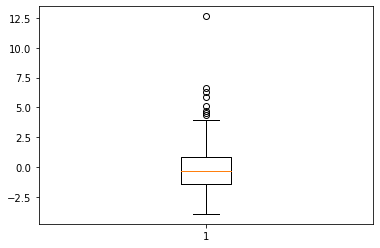

In [36]:
# We will do the outlier analysis using inter quartile range
# for PC1
#fig = plt.figure(figsize = (6,5))
#ax = fig.add_subplot(111)
plt.boxplot(df_pca2.PC1)
Q1 = df_pca2.PC1.quantile(0.03)
Q3 = df_pca2.PC1.quantile(0.97)
IQR = Q3 - Q1
df_pca2 = df_pca2[(df_pca2.PC1 >= Q1) & (df_pca2.PC1 <= Q3)]

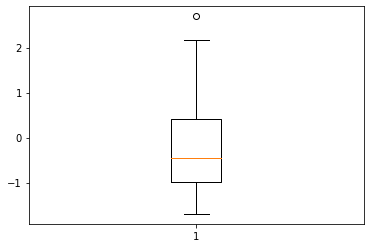

In [37]:
# for PC2
#fig = plt.figure(figsize = (6,5))
#ax = fig.add_subplot(111)
plt.boxplot(df_pca2.PC2)
Q1 = df_pca2.PC2.quantile(0.03)
Q3 = df_pca2.PC2.quantile(0.97)
IQR = Q3-Q1
df_pca2 = df_pca2[(df_pca2.PC2>=Q1) & (df_pca2.PC2 <= Q3 )]

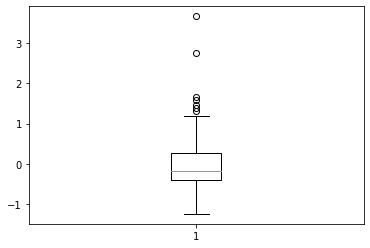

In [38]:
# for PC3
#fig = plt.figure(figsize = (6,5))
#ax = fig.add_subplot(111)
plt.boxplot(df_pca2.PC3)
Q1 = df_pca2.PC3.quantile(0.03)
Q3 = df_pca2.PC3.quantile(0.97)
IQR = Q3-Q1
df_pca2 = df_pca2[(df_pca2.PC3 >= Q1) & (df_pca2.PC3 <= Q3 )]

In [39]:
# Check the data
df_pca2.head(10)

,PC1,PC2,PC3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
2,-0.457626,-0.673301,0.961867,Algeria
4,0.649849,-1.024374,-0.250103,Antigua and Barbuda
6,-0.332692,-1.274517,0.176636,Armenia
7,3.180362,-0.250785,-0.116877,Australia
8,3.815682,0.256083,-0.270495,Austria
9,-0.467515,-0.493492,0.603288,Azerbaijan
10,1.498752,-0.428907,-0.550238,Bahamas
11,1.470971,-0.326796,0.428412,Bahrain
12,-1.014199,-0.711808,-0.116989,Bangladesh


In [40]:
column_names =  ['country']
country_data  = pd.DataFrame(columns = column_names)
country_data['country'] = df_pca2.country

country_data = country_data.reset_index(drop = True)

In [41]:
country_data.head()

,country
0,Afghanistan
1,Algeria
2,Antigua and Barbuda
3,Armenia
4,Australia


In [42]:
country_data.shape

(137, 1)

In [43]:
df_pca2.shape

(137, 4)

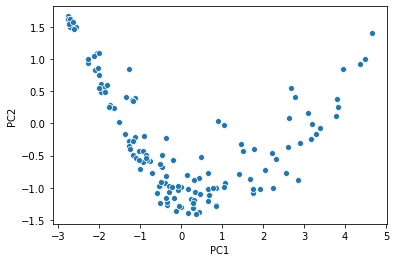

In [44]:
# We can visualize the data points of dataframe variables
sns.scatterplot(x = 'PC1',y = 'PC2',data = df_pca2)

In [45]:
df_pca2.head(10)

,PC1,PC2,PC3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
2,-0.457626,-0.673301,0.961867,Algeria
4,0.649849,-1.024374,-0.250103,Antigua and Barbuda
6,-0.332692,-1.274517,0.176636,Armenia
7,3.180362,-0.250785,-0.116877,Australia
8,3.815682,0.256083,-0.270495,Austria
9,-0.467515,-0.493492,0.603288,Azerbaijan
10,1.498752,-0.428907,-0.550238,Bahamas
11,1.470971,-0.326796,0.428412,Bahrain
12,-1.014199,-0.711808,-0.116989,Bangladesh


## Clustering ##

In [46]:
# drop the country column again for the clustering 
df_pca_final = df_pca2.drop(['country'],axis = 1)
df_pca_final.shape

(137, 3)

In [47]:
df_pca_final.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
2,-0.457626,-0.673301,0.961867
4,0.649849,-1.024374,-0.250103
6,-0.332692,-1.274517,0.176636
7,3.180362,-0.250785,-0.116877


In [48]:
# Pefrom the hopkins test to check whether the data is good for clustering

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
import numpy as np
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [49]:
hopkins(df_pca_final)

0.8096908102115086

In [50]:
# We got good value of hopkins, we can for clustering

In [51]:
df_clust = df_pca_final

In [52]:
df_clust.reset_index(drop = True,inplace = True)

In [53]:
df_clust.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


### K -Means Clustering ###

In [54]:
# To find the number of clusters,we use the elbow curve method
ssd = []
for num_clusters in list(range(1,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(df_clust)
    ssd.append(model_clus.inertia_)

ssd

[578.8611304964816,
 272.9761712478939,
 133.46881907864082,
 99.60610789255546,
 80.01264718281189,
 68.71788549496915,
 58.63031926127828,
 49.24591921854527,
 41.53213871223929]

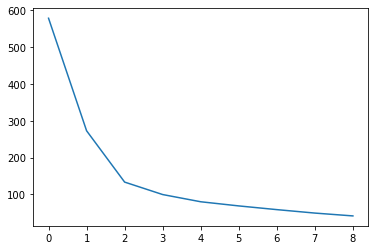

In [55]:
plt.plot(ssd)

In [56]:
# from above plot analysis, it is observed that three clusters will be required for this data

In [57]:
# lets check for the silhouette score
from sklearn.metrics import silhouette_score

In [58]:
sse = []
for num_clusters in range(2,11):
    # initialize kmeans
    kmeans = KMeans(n_clusters = num_clusters,max_iter = 50)
    kmeans.fit(df_clust)
    
    cluster_labels = kmeans.labels_
    
    
    # silhouette score
    silhouette_avg = silhouette_score(df_clust,cluster_labels)
    sse.append([num_clusters,silhouette_avg])
    print("For n_clusters={0},the silhouette score is {1}".format(num_clusters,silhouette_avg))

For n_clusters=2,the silhouette score is 0.5000634021131839
For n_clusters=3,the silhouette score is 0.49347424427103787
For n_clusters=4,the silhouette score is 0.40404766054776864
For n_clusters=5,the silhouette score is 0.38272694839425775
For n_clusters=6,the silhouette score is 0.3568758689123927
For n_clusters=7,the silhouette score is 0.3865168740766413
For n_clusters=8,the silhouette score is 0.386879805622887
For n_clusters=9,the silhouette score is 0.3926139272499031
For n_clusters=10,the silhouette score is 0.3891067696165215


In [59]:
sse

[[2, 0.5000634021131839],
 [3, 0.49347424427103787],
 [4, 0.40404766054776864],
 [5, 0.38272694839425775],
 [6, 0.3568758689123927],
 [7, 0.3865168740766413],
 [8, 0.386879805622887],
 [9, 0.3926139272499031],
 [10, 0.3891067696165215]]

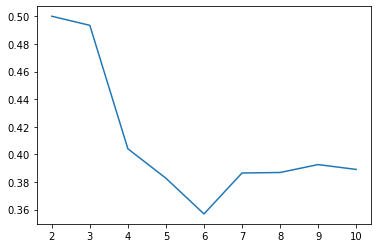

In [60]:
# lets plot it
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]);

###### from elbow method, we found the 3 clusters.
###### we will check the k means clustering for 3 and 4 clusters both and check which one is more significant.
###### Fistly, check for K = 3

In [61]:
k_model_3 = KMeans(n_clusters = 3, max_iter=50,random_state = 50)
k_model_3.fit(df_clust)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [62]:
data_kmeans_3=df_pca2
data_kmeans_3.index = pd.RangeIndex(len(data_kmeans_3.index))
df_kmeans_3 = pd.concat([data_kmeans_3, pd.Series(k_model_3.labels_)], axis=1)
df_kmeans_3.columns = ['PC1', 'PC2','PC3','country','cluster_id']
df_kmeans_3.head(20)

,PC1,PC2,PC3,country,cluster_id
0,-2.637442,1.469038,-0.541359,Afghanistan,2
1,-0.457626,-0.673301,0.961867,Algeria,0
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda,0
3,-0.332692,-1.274517,0.176636,Armenia,0
4,3.180362,-0.250785,-0.116877,Australia,1
5,3.815682,0.256083,-0.270495,Austria,1
6,-0.467515,-0.493492,0.603288,Azerbaijan,0
7,1.498752,-0.428907,-0.550238,Bahamas,1
8,1.470971,-0.326796,0.428412,Bahrain,1
9,-1.014199,-0.711808,-0.116989,Bangladesh,0


In [63]:
# Check the value counts of each country cluster wise
df_kmeans_3['cluster_id'].value_counts()

0    72
2    34
1    31
Name: cluster_id, dtype: int64

In [64]:
# plot the scatter plots with clusters = 3 for different variables

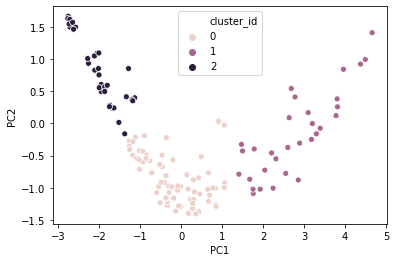

In [65]:
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data = df_kmeans_3)

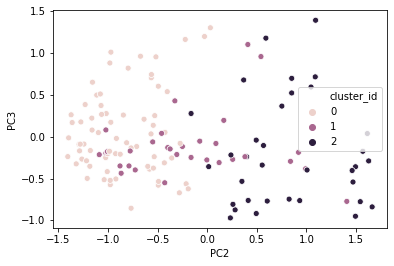

In [66]:
sns.scatterplot(x='PC2',y='PC3',hue='cluster_id',legend='full',data=df_kmeans_3)

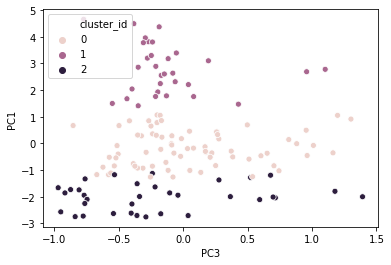

In [67]:
sns.scatterplot(x='PC3',y='PC1',hue='cluster_id',legend='full',data=df_kmeans_3)

###### Now check with 4 number of clusters #####

In [68]:
k_model_4 = KMeans(n_clusters = 4, max_iter=50,random_state = 50)
k_model_4.fit(df_clust)

KMeans(max_iter=50, n_clusters=4, random_state=50)

In [69]:
data_kmeans_4=df_pca2
data_kmeans_4.index = pd.RangeIndex(len(data_kmeans_4.index))
df_kmeans_4 = pd.concat([data_kmeans_4, pd.Series(k_model_4.labels_)], axis=1)
df_kmeans_4.columns = ['PC1', 'PC2','PC3','country','cluster_id']
df_kmeans_4.head(20)

,PC1,PC2,PC3,country,cluster_id
0,-2.637442,1.469038,-0.541359,Afghanistan,0
1,-0.457626,-0.673301,0.961867,Algeria,3
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda,1
3,-0.332692,-1.274517,0.176636,Armenia,3
4,3.180362,-0.250785,-0.116877,Australia,2
5,3.815682,0.256083,-0.270495,Austria,2
6,-0.467515,-0.493492,0.603288,Azerbaijan,3
7,1.498752,-0.428907,-0.550238,Bahamas,1
8,1.470971,-0.326796,0.428412,Bahrain,1
9,-1.014199,-0.711808,-0.116989,Bangladesh,3


In [70]:
# Check the value counts of each country cluster wise
df_kmeans_4['cluster_id'].value_counts()

3    48
1    35
0    33
2    21
Name: cluster_id, dtype: int64

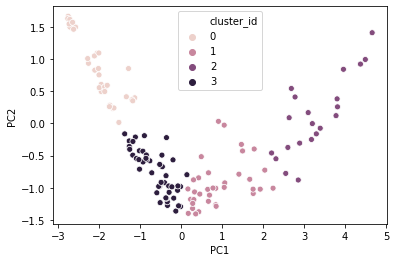

In [71]:
sns.scatterplot(x='PC1',y='PC2',hue='cluster_id',legend='full',data=df_kmeans_4)

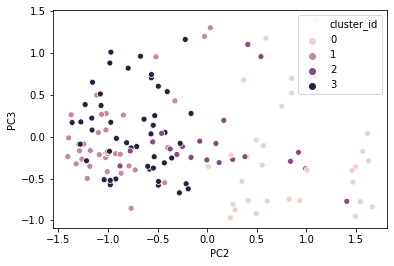

In [72]:
sns.scatterplot(x='PC2',y='PC3',hue='cluster_id',legend='full',data=df_kmeans_4)

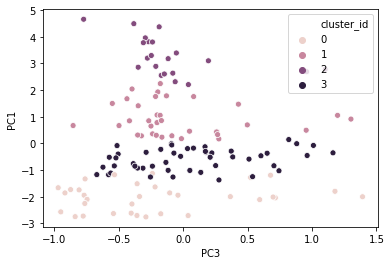

In [73]:
sns.scatterplot(x='PC3',y='PC1',hue='cluster_id',legend='full',data=df_kmeans_4)

In [74]:
df_kmeans_4.head()

,PC1,PC2,PC3,country,cluster_id
0,-2.637442,1.469038,-0.541359,Afghanistan,0
1,-0.457626,-0.673301,0.961867,Algeria,3
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda,1
3,-0.332692,-1.274517,0.176636,Armenia,3
4,3.180362,-0.250785,-0.116877,Australia,2


### From the above analysis, we can move a head with 3 number of clusters

In [75]:
merged = pd.merge(country_data,df_kmeans_3,left_on = 'country',right_on = 'country')
merged.shape

(137, 5)

In [76]:
merged.head()

,country,PC1,PC2,PC3,cluster_id
0,Afghanistan,-2.637442,1.469038,-0.541359,2
1,Algeria,-0.457626,-0.673301,0.961867,0
2,Antigua and Barbuda,0.649849,-1.024374,-0.250103,0
3,Armenia,-0.332692,-1.274517,0.176636,0
4,Australia,3.180362,-0.250785,-0.116877,1


In [77]:
# Dropping the Principal componnents
df_drop = merged.drop(['PC1','PC2','PC3'],axis = 1)
df_drop.head()

,country,cluster_id
0,Afghanistan,2
1,Algeria,0
2,Antigua and Barbuda,0
3,Armenia,0
4,Australia,1


In [78]:
merged_2 = pd.merge(df_country,df_drop,left_on = 'country',right_on = 'country')

In [79]:
merged_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,0
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,1


In [80]:
merged_2.shape

(137, 11)

### Analysis of Clusters ###

In [81]:
# For analysis, we will check the mean for the variables.

In [82]:
clus_childmort  = pd.DataFrame(merged_2.groupby(["cluster_id"]).child_mort.mean())
clus_exports    = pd.DataFrame(merged_2.groupby(["cluster_id"]).exports.mean())
clus_health     = pd.DataFrame(merged_2.groupby(["cluster_id"]).health.mean())
clus_imports    = pd.DataFrame(merged_2.groupby(["cluster_id"]).imports.mean())
clus_income     = pd.DataFrame(merged_2.groupby(["cluster_id"]).income.mean())
clus_inflation  = pd.DataFrame(merged_2.groupby(["cluster_id"]).inflation.mean())
clus_life_expec = pd.DataFrame(merged_2.groupby(["cluster_id"]).life_expec.mean())
clus_total_fer  = pd.DataFrame(merged_2.groupby(["cluster_id"]).total_fer.mean())
clus_gdpp       = pd.DataFrame(merged_2.groupby(["cluster_id"]).gdpp.mean())

df_result = pd.concat([pd.Series([0,1,2]),clus_childmort,clus_exports,clus_health,clus_imports,clus_income,clus_inflation,clus_life_expec,clus_total_fer,clus_gdpp],axis = 1)
df_result.columns = ['cluster_id','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df_result.head()

,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,22.595833,2940.913424,391.334236,3002.947265,12435.555556,6.620986,72.748611,2.320833,6362.000000
1,1,5.193548,17457.977419,3533.891613,16165.593548,38061.290323,2.008097,79.825806,1.767742,36716.129032
2,2,74.226471,667.872118,118.316188,711.447676,3710.058824,10.678529,61.317647,4.744706,1804.500000


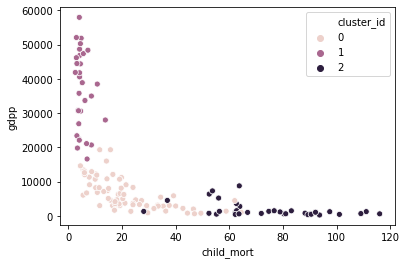

In [83]:
# We can check visually all the variables with their cluster ids
sns.scatterplot(x='child_mort',y='gdpp',hue = 'cluster_id',data=merged_2)

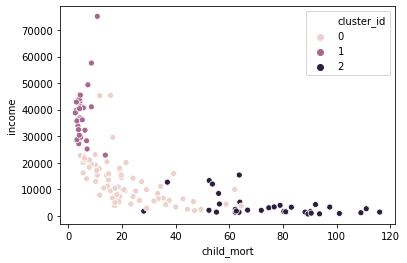

In [84]:
sns.scatterplot(x='child_mort',y='income',hue = 'cluster_id',data=merged_2)

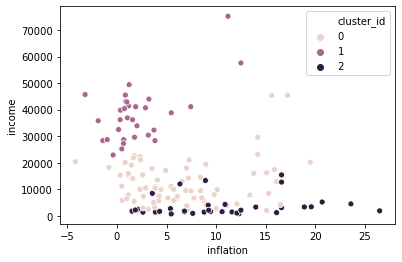

In [85]:
sns.scatterplot(x='inflation',y='income',hue = 'cluster_id',data=merged_2)

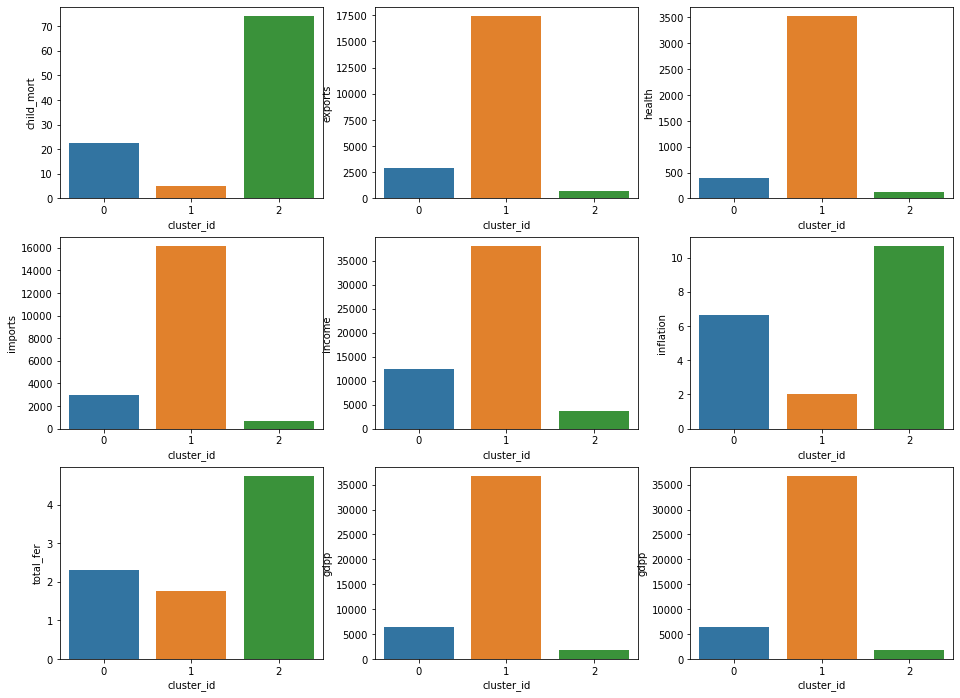

In [86]:
# We can check the variation of every column on the basis of cluster id
plt.figure(figsize = (16,12))
plt.subplot(3,3,1)
sns.barplot(x = df_result.cluster_id, y = df_result.child_mort)
plt.subplot(3,3,2)
sns.barplot(x = df_result.cluster_id, y = df_result.exports)
plt.subplot(3,3,3)
sns.barplot(x = df_result.cluster_id, y = df_result.health)
plt.subplot(3,3,4)
sns.barplot(x = df_result.cluster_id, y = df_result.imports)
plt.subplot(3,3,5)
sns.barplot(x = df_result.cluster_id, y = df_result.income)
plt.subplot(3,3,6)
sns.barplot(x = df_result.cluster_id, y = df_result.inflation)
plt.subplot(3,3,7)
sns.barplot(x = df_result.cluster_id, y = df_result.total_fer)
plt.subplot(3,3,8)
sns.barplot(x = df_result.cluster_id, y = df_result.gdpp)
plt.subplot(3,3,9)
sns.barplot(x = df_result.cluster_id, y = df_result.gdpp)

##### From above bar plots, we observed the following#####
##### > For cluster-2, variables--child_mort, total_fer, inflation, values are very high and for variables-- income, health,gdpp,income, exports, imports,the values are very low.#####
##### > For cluster-0, variables--child_mort, total_fer, inflation, values are very low and for variables-- income, health,gdpp,income, exports, imports,the values are high.#####
##### >  Values of variables for clustrer 1 lies in between the clusters 0 and 2.
##### Cluster -2 countries required help which are in direst need of aid.

In [87]:
# Now, we can find the top 5 to 10 countries requires help which are in direst need of aid.

In [88]:
# list the countries with the cluster value
df_cluster_2 = merged_2.loc[(merged_2.cluster_id==2)]
df_cluster_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553,2
16,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.92,57.1,2.88,6350,2
19,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
27,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769,2


In [89]:
df_cluster_2.shape

(34, 11)

In [90]:
# there are total 31 countries in cluster 2

In [91]:
# To find the top 5 to 10 countries, it is required to sort them on the basis of variables to find the country name.

In [92]:
df_cluster_2_sorted = df_cluster_2.sort_values(['gdpp'],ascending = True)

In [93]:
df_cluster_2_sorted

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
73,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
76,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2
87,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
77,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,2
39,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,2
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553,2
45,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562,2
103,Rwanda,63.6,67.5600,59.1150,168.900,1350,2.61,64.6,4.51,563,2
19,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,2


In [94]:
df_cluster_2_sorted = df_cluster_2.sort_values(['income'],ascending = True)

In [95]:
df_cluster_2_sorted.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
73,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
87,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
77,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,2
52,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,2


In [96]:
df_cluster_2_sorted = df_cluster_2.sort_values(['child_mort'],ascending = False)

In [97]:
df_cluster_2_sorted.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
19,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2
30,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.39,56.3,5.27,1220,2
52,Guinea,109.0,196.344,31.9464,279.936,1190,16.10,58.0,5.34,648,2
87,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419,2
81,Mauritania,97.4,608.400,52.9200,734.400,3320,18.90,68.2,4.98,1200,2


In [98]:
df_cluster_2_sorted = df_cluster_2.sort_values(['inflation'],ascending = False)
df_cluster_2_sorted.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
121,Timor-Leste,62.6,79.20,328.320,1000.80,1850,26.5,71.1,6.23,3600,2
135,Yemen,56.3,393.00,67.858,450.64,4480,23.6,67.5,4.67,1310,2
28,"Congo, Rep.",63.9,2331.74,67.404,1498.78,5190,20.7,60.4,4.95,2740,2
115,Sudan,76.7,291.56,93.536,254.56,3370,19.6,66.3,4.88,1480,2
81,Mauritania,97.4,608.40,52.920,734.40,3320,18.9,68.2,4.98,1200,2


In [99]:
df_cluster_2_sorted.drop(['cluster_id'],axis = 1).describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,74.226471,667.872118,118.316188,711.447676,3710.058824,10.678529,61.317647,4.744706,1804.500000
std,20.774246,1092.698824,155.752221,803.623680,3912.077569,6.474200,4.868543,0.936613,2134.351867
min,28.100000,20.605200,12.821200,90.552000,700.000000,1.520000,52.000000,2.590000,231.000000
25%,62.200000,105.979500,35.657925,202.390500,1422.500000,5.690000,57.750000,4.247500,566.000000
50%,73.300000,197.257000,53.264750,400.286500,2100.000000,9.345000,61.250000,4.815000,1020.000000
75%,89.975000,591.350000,91.650500,934.200000,3827.500000,15.575000,65.125000,5.385000,1475.000000
max,116.000000,5048.750000,650.832000,3257.550000,15400.000000,26.500000,71.100000,6.260000,8750.000000


In [100]:
# binn the data
# child_mort > 60
# income < 3200
# gdpp < 1800

In [101]:
data_k = df_cluster_2_sorted[df_cluster_2_sorted['child_mort'] > 80]
data_k = data_k[data_k['income'] < 3200]
data_k = data_k[data_k['gdpp']< 2000]

In [102]:
data_k.shape

(11, 11)

In [103]:
data_k.drop(['cluster_id'],axis = 1).sort_values(['gdpp'],ascending = True).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
73,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
87,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
77,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553
45,Gambia,80.3,133.7560,31.9778,239.974,1660,4.30,65.5,5.71,562
19,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575
126,Uganda,81.0,101.7450,53.6095,170.170,1540,10.60,56.8,6.15,595
52,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648
27,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769


##### As per the K-means clustering, above are the coutries which are direst need of aid #####

### Hierarchical Clustering ###

In [104]:
df_pca_final.reset_index(drop= True,inplace = True)

In [105]:
df_pca_final.head()

,PC1,PC2,PC3
0,-2.637442,1.469038,-0.541359
1,-0.457626,-0.673301,0.961867
2,0.649849,-1.024374,-0.250103
3,-0.332692,-1.274517,0.176636
4,3.180362,-0.250785,-0.116877


In [106]:
df_pca_final.shape

(137, 3)

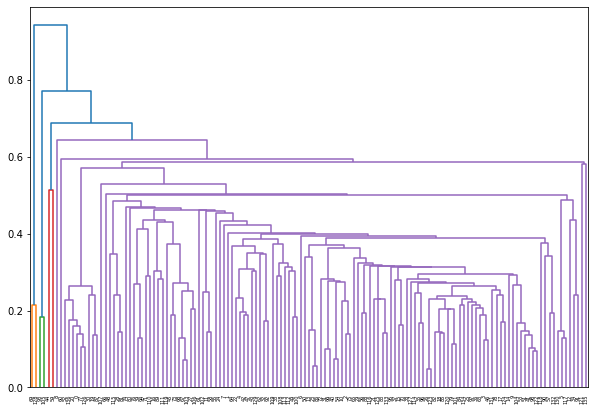

In [107]:
# Single-linkage
plt.figure(figsize = (10,7))
mergings = linkage(df_pca_final,method = 'single',metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [108]:
# There are no useful insights from the single linkage. Now, check for the complete linkage 

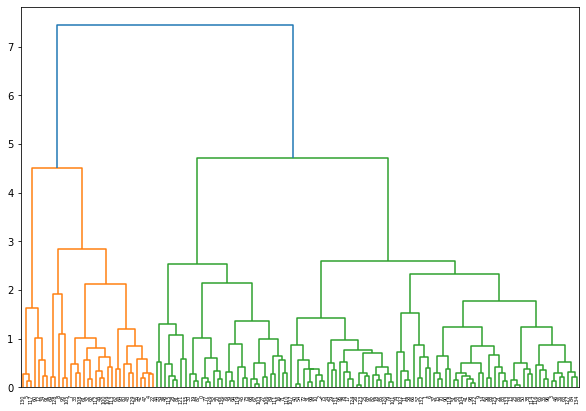

In [109]:
plt.figure(figsize = (10,7))
mergings = linkage(df_pca_final,method = 'complete',metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [110]:
# from above dendrogram, it is observed that we can segment the data into 4 clusters

In [111]:
cut_dendro = cut_tree(mergings, n_clusters = 4)
cut_dendro.shape

(137, 1)

In [112]:
#cut_dendro

In [113]:
# Required to reshape
cluster_labels = cut_dendro.reshape(-1,)
cluster_labels

array([0, 1, 1, 1, 2, 3, 1, 2, 2, 1, 1, 1, 3, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2, 3, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       0, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 3, 2, 2, 1, 2, 1,
       1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 3, 2, 2, 0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 2, 2,
       0, 0, 2, 2, 1, 0, 1, 3, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1,
       1, 1, 1, 0, 0])

In [114]:
# Now we can concatenat the dataframes for required dataset
hir_clust = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
df_hc = pd.concat([df_pca_final,hir_clust],axis = 1)
df_hc.columns = ['PC1','PC2','PC3','cluster_id']

In [115]:
df_hc.head()

,PC1,PC2,PC3,cluster_id
0,-2.637442,1.469038,-0.541359,0
1,-0.457626,-0.673301,0.961867,1
2,0.649849,-1.024374,-0.250103,1
3,-0.332692,-1.274517,0.176636,1
4,3.180362,-0.250785,-0.116877,2


In [116]:
df_pca2.head()

,PC1,PC2,PC3,country
0,-2.637442,1.469038,-0.541359,Afghanistan
1,-0.457626,-0.673301,0.961867,Algeria
2,0.649849,-1.024374,-0.250103,Antigua and Barbuda
3,-0.332692,-1.274517,0.176636,Armenia
4,3.180362,-0.250785,-0.116877,Australia


In [117]:
df_pca2.shape

(137, 4)

In [118]:
df_hc['country'] = df_pca2['country']
df_hc.head()

,PC1,PC2,PC3,cluster_id,country
0,-2.637442,1.469038,-0.541359,0,Afghanistan
1,-0.457626,-0.673301,0.961867,1,Algeria
2,0.649849,-1.024374,-0.250103,1,Antigua and Barbuda
3,-0.332692,-1.274517,0.176636,1,Armenia
4,3.180362,-0.250785,-0.116877,2,Australia


In [119]:
merged_4 = pd.merge(df_country,df_hc,left_on = 'country',right_on = 'country')

In [120]:
merged_4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,-2.637442,1.469038,-0.541359,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,-0.457626,-0.673301,0.961867,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0.649849,-1.024374,-0.250103,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,-0.332692,-1.274517,0.176636,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.16,82.0,1.93,51900,3.180362,-0.250785,-0.116877,2


In [121]:
merged_4.shape

(137, 14)

In [122]:
# drop principal components 
df_final_hc = merged_4.drop(['PC1','PC2','PC3'],axis = 1)

In [123]:
df_final_hc.head(20)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,1
4,Australia,4.8,10276.20,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,2
5,Austria,4.3,24059.70,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,3
6,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,1
7,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,2
8,Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,2
9,Bangladesh,49.4,121.28,26.6816,165.244,2440,7.140,70.4,2.33,758,1


In [124]:
# count the cluster values
df_final_hc['cluster_id'].value_counts()

1    71
0    33
2    26
3     7
Name: cluster_id, dtype: int64

#### Analysis of hierarchical clusters ####

In [125]:
hc_childmort  = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).child_mort.mean())
hc_exports    = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).exports.mean())
hc_health     = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).health.mean())
hc_imports    = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).imports.mean())
hc_income     = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).income.mean())
hc_inflation  = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).inflation.mean())
hc_life_expec = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).life_expec.mean())
hc_total_fer  = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).total_fer.mean())
hc_gdpp       = pd.DataFrame(df_final_hc.groupby(["cluster_id"]).gdpp.mean())

df_result_hc = pd.concat([pd.Series([0,1,2,3]),hc_childmort,hc_exports,hc_health,hc_imports,hc_income,hc_inflation,hc_life_expec,hc_total_fer,hc_gdpp],axis = 1)
df_result_hc.columns = ['cluster_id','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
df_result_hc.head()

,cluster_id,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,74.887879,684.778485,120.564182,719.901606,3758.545455,10.623333,61.066667,4.782121,1836.818182
1,1,23.266197,2670.462374,378.276301,2849.634804,11362.957746,6.428324,72.623944,2.320423,5918.338028
2,2,6.019231,13835.773077,2701.898462,12754.338462,36876.923077,3.432269,79.403846,1.836154,31846.153846
3,3,4.557143,29102.871429,5809.122857,26263.028571,44542.857143,0.830286,80.185714,1.845714,49828.571429


In [126]:
df_result_hc.shape

(4, 10)

In [127]:
# Now, in a similar way we can visualize the variables in terms of clusters

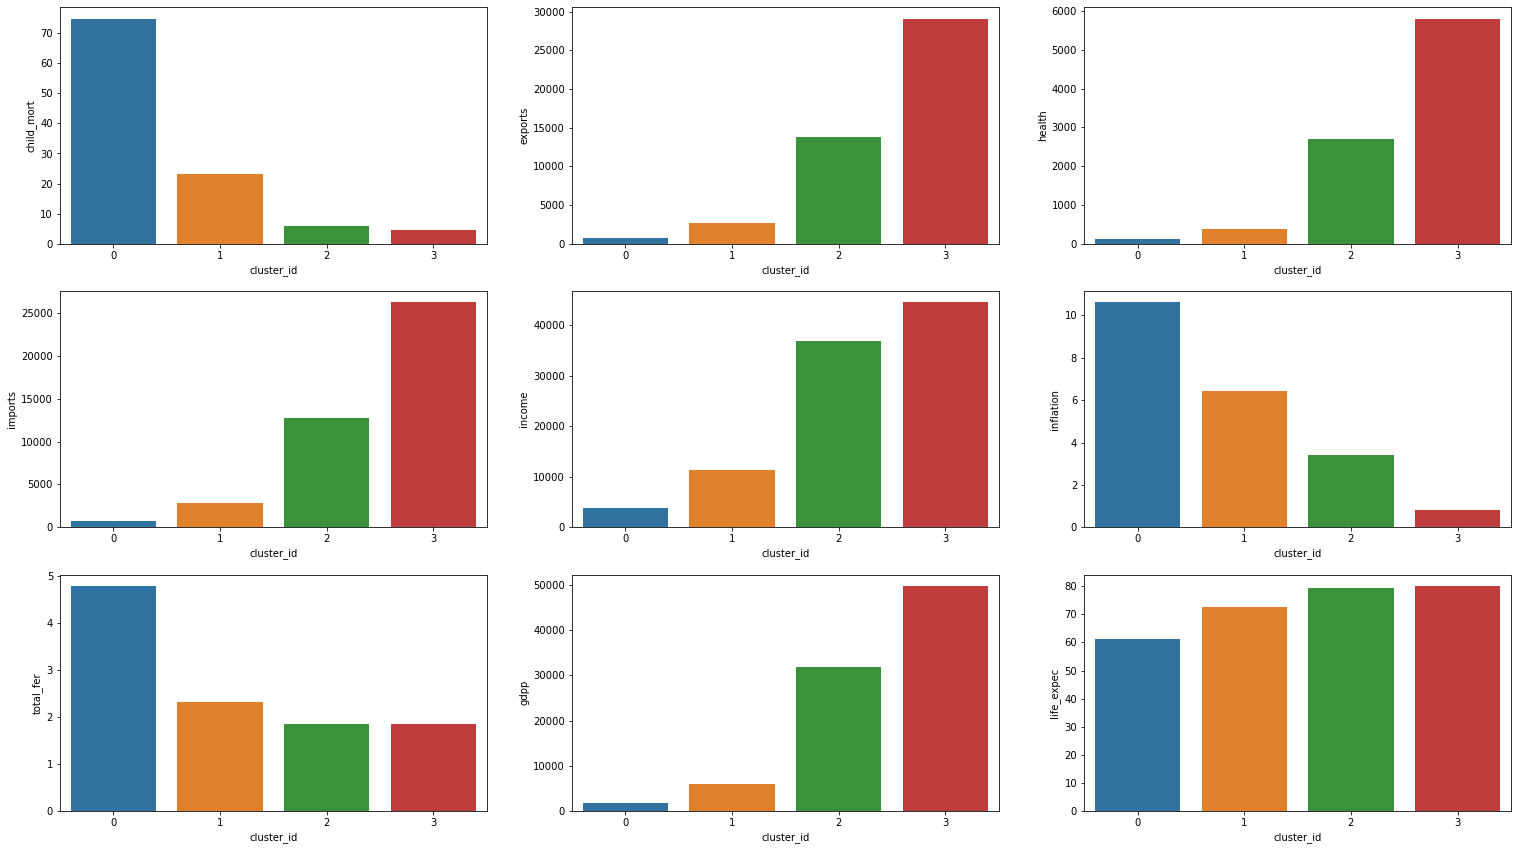

In [128]:
# We can check the variation of every column on the basis of cluster id
plt.figure(figsize = (26,20))
plt.subplot(4,3,1)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.child_mort)
plt.subplot(4,3,2)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.exports)
plt.subplot(4,3,3)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.health)
plt.subplot(4,3,4)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.imports)
plt.subplot(4,3,5)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.income)
plt.subplot(4,3,6)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.inflation)
plt.subplot(4,3,7)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.total_fer)
plt.subplot(4,3,8)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.gdpp)
plt.subplot(4,3,9)
sns.barplot(x = df_result_hc.cluster_id, y = df_result_hc.life_expec)

##### Insights from the above figure #####

###### > Cluster-0 --> variables "child_mort","inflation","tota_fer" are high as compared to other clusters and variables "income","gdpp",'imports',"exports","health" are low.######
###### > Cluster-1 --> variables "child_mort","inflation","tota_fer" are high but lower than that of cluster 0 and variables "income","gdpp",'imports',"exports","health" are low but slightly higher than cluster 0.######
###### > Cluster-2 --> variables "child_mort","inflation","tota_fer" are moderatly low and variables "income","gdpp",'imports',"exports","health" are moderatly high.######
###### > Cluster-3 --> variables "child_mort","inflation","tota_fer" are low and variables "income","gdpp",'imports',"exports","health" are significantly high.######

##### So, the countries lies in clusters 0 and 1  are need of help rather than other countries.

In [129]:
country_cl_0 = df_final_hc.loc[(df_final_hc.cluster_id == 0)]
country_cl_1 = df_final_hc.loc[(df_final_hc.cluster_id == 1)]
country_cl_2 = df_final_hc.loc[(df_final_hc.cluster_id == 2)]
country_cl_3 = df_final_hc.loc[(df_final_hc.cluster_id == 3)]
country_cl_0_1 = df_final_hc.loc[(df_final_hc.cluster_id == 0) | (df_final_hc.cluster_id == 1 )]

In [130]:
country_cl_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553,0
16,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.92,57.1,2.88,6350,0
19,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575,0
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
27,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769,0


In [131]:
country_cl_0.shape

(33, 11)

In [132]:
cl_hc_0 = country_cl_0.sort_values(['gdpp'],ascending = [True])
cl_hc_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
73,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
76,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0
87,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0
77,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0


In [133]:
cl_hc_0 = country_cl_0.sort_values(['income'],ascending = [True])
cl_hc_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
73,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0
87,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0
77,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0
52,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,0


In [134]:
cl_hc_0 = country_cl_0.sort_values(['child_mort'],ascending = [False])
cl_hc_0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
19,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,0
30,Cote d'Ivoire,111.0,617.320,64.6600,528.260,2690,5.39,56.3,5.27,1220,0
52,Guinea,109.0,196.344,31.9464,279.936,1190,16.10,58.0,5.34,648,0
87,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419,0
81,Mauritania,97.4,608.400,52.9200,734.400,3320,18.90,68.2,4.98,1200,0


In [135]:
cl_hc_0 = country_cl_0.sort_values(['inflation'],ascending = [False])
cl_hc_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
121,Timor-Leste,62.6,79.2000,328.3200,1000.800,1850,26.50,71.1,6.23,3600,0
135,Yemen,56.3,393.0000,67.8580,450.640,4480,23.60,67.5,4.67,1310,0
28,"Congo, Rep.",63.9,2331.7400,67.4040,1498.780,5190,20.70,60.4,4.95,2740,0
115,Sudan,76.7,291.5600,93.5360,254.560,3370,19.60,66.3,4.88,1480,0
81,Mauritania,97.4,608.4000,52.9200,734.400,3320,18.90,68.2,4.98,1200,0
44,Gabon,63.7,5048.7500,306.2500,1653.750,15400,16.60,62.9,4.08,8750,0
48,Ghana,74.7,386.4500,68.3820,601.290,3060,16.60,62.2,4.27,1310,0
59,Iraq,36.9,1773.0000,378.4500,1534.500,12700,16.60,67.2,4.56,4500,0
52,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648,0
136,Zambia,83.1,540.2000,85.9940,451.140,3280,14.00,52.0,5.40,1460,0


In [136]:
# We can bin the data set by providing some conditions or threshold values to get the desired name of countries

In [137]:
country_cl_0.drop(['cluster_id'],axis = 1).describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,74.887879,684.778485,120.564182,719.901606,3758.545455,10.623333,61.066667,4.782121,1836.818182
std,20.729625,1105.115913,157.606006,814.546950,3962.345463,6.566452,4.715378,0.924972,2158.979945
min,28.100000,20.605200,12.821200,90.552000,700.000000,1.520000,52.000000,2.590000,231.000000
25%,62.200000,104.652000,34.681900,201.760000,1420.000000,5.470000,57.700000,4.270000,563.000000
50%,74.700000,198.170000,53.609500,397.573000,2090.000000,9.250000,60.800000,4.880000,1040.000000
75%,90.200000,608.400000,93.536000,1000.800000,3980.000000,16.100000,64.600000,5.400000,1480.000000
max,116.000000,5048.750000,650.832000,3257.550000,15400.000000,26.500000,71.100000,6.260000,8750.000000


In [138]:
# In the main dataframe, now we can find the name of countries which required direst need of aid by cut of limit on various variables.

In [139]:
country_cl_0_1.shape

(104, 11)

In [140]:
country_cl_0_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
2,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
3,Armenia,18.1,669.76,141.6800,1458.660,6700,7.77,73.3,1.69,3220,1
6,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.80,69.1,1.92,5840,1


In [141]:
country_cl_0_1.drop(['cluster_id'],axis = 1).describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,39.646154,2040.389601,296.502263,2173.854078,8950.019231,7.759433,68.956731,3.101538,4623.240385
std,29.259923,2420.723696,294.479429,2332.621774,6802.437042,5.881171,6.780909,1.379126,4019.795671
min,4.500000,1.076920,12.821200,0.651092,700.000000,-4.210000,52.000000,1.250000,231.000000
25%,17.050000,391.362500,63.273750,463.537500,3032.500000,3.060000,65.125000,2.055000,1272.500000
50%,29.150000,1140.385000,192.282500,1478.720000,7295.000000,6.875000,70.350000,2.635000,3270.000000
75%,62.200000,2733.950000,412.560500,2908.150000,14050.000000,11.225000,74.275000,4.247500,6905.000000
max,116.000000,10964.600000,1275.200000,11664.000000,29600.000000,26.500000,80.400000,6.260000,16000.000000


In [142]:
# binn
# child_mort > 70
# income < 3500
# inflation > 8
# gdpp < 1800

In [143]:
data = country_cl_0_1[country_cl_0_1['child_mort'] > 80]
data = data[data['income'] < 6000 ]
#data = data[data['inflation'] > 8]
data = data[data['gdpp']< 1800]

In [144]:
data.shape

(14, 11)

In [145]:
Final_list_hc = data.drop(['cluster_id'],axis = 1).sort_values(['child_mort'],ascending = False)
Final_list_hc.reset_index(drop= True, inplace = True)
Final_list_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575
1,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.39,56.3,5.27,1220
2,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648
3,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
4,Mauritania,97.4,608.4000,52.9200,734.400,3320,18.90,68.2,4.98,1200
5,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
6,Pakistan,92.1,140.4000,22.8800,201.760,4280,10.90,65.3,3.85,1040
7,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
8,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553
9,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327


##### As per hierarchical clustering, above are the top countries which are direst need of funds for development.#####

In [146]:
Final_list_kmeans = data_k.drop(['cluster_id'],axis = 1).sort_values(['child_mort'],ascending = False)
Final_list_kmeans.reset_index(drop= True, inplace = True)
Final_list_kmeans

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575
1,Cote d'Ivoire,111.0,617.3200,64.6600,528.260,2690,5.39,56.3,5.27,1220
2,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648
3,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
4,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
5,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
6,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553
7,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
8,Comoros,88.2,126.8850,34.6819,397.573,1410,3.87,65.9,4.75,769
9,Uganda,81.0,101.7450,53.6095,170.170,1540,10.60,56.8,6.15,595


##### As per the k means clustering, above are the top countries which are direst need of funds for development. #####